In [2]:
import cv2
import PIL
import os
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [64]:
image = cv2.imread('test_crop.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

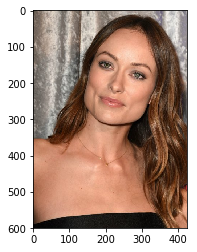

In [65]:
plt.imshow(image,cmap='gray')

In [66]:
image.shape

(600, 424, 3)

In [3]:
#image = cv2.imread(path)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def crop_faces(image):
    """
    Заюзать на выходе np.expand_dims(face_crop,-1), чтобы заюзать keras
    """
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # конвертируем изображение в RGB
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) # делаем изображение ЧБ
    faces = face_cascade.detectMultiScale(gray_image, 1.25, 6) # находим лица 
    image_copy = np.copy(image)
    
    face_crop = []
    for f in faces:
        x, y, w, h = [ v for v in f ]
      #  cv2.rectangle(image_copy, (x,y), (x+w, y+h), (255,0,0), 3)
        face_crop.append(gray_image[y:y+h, x:x+w])
    
    return face_crop



def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

def distance(emb1, emb2): 
    return np.sum(np.square(emb1 - emb2))

# Crop Image

In [68]:
cropped_face = crop_faces(image)
cropped_face[0].shape

(231, 231)

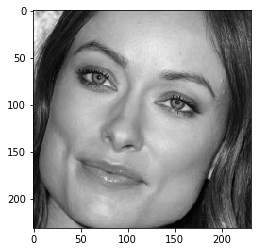

In [69]:
plt.imshow(cropped_face[0],cmap='gray')

# Reshape image 

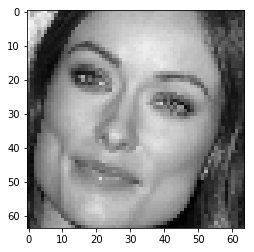

In [70]:
resized_image = cv2.resize(cropped_face[0], (64, 64))
plt.imshow(resized_image,cmap='gray')

In [71]:
resized_image.shape

(64, 64)

# Rotate Image

In [72]:
rotate_f = rotate_image(cropped_face[0],14)

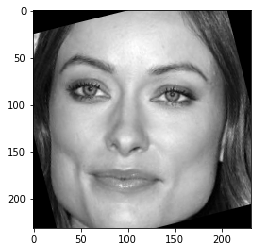

In [73]:
plt.imshow(rotate_f,cmap='gray')